# Data Science Pipeline: pandas, seaborn, scikit-learn

In [1]:
# Import pandas
import pandas as pd

In [9]:
# Read data
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Display 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
# Display last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [11]:
# Check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

## Visualize Data in Seaborn

In [12]:
# Import Seaborn
import seaborn as sns

# Allow plots to appear within the notebook
%matplotlib inline

C:\Users\Gene\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gene\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


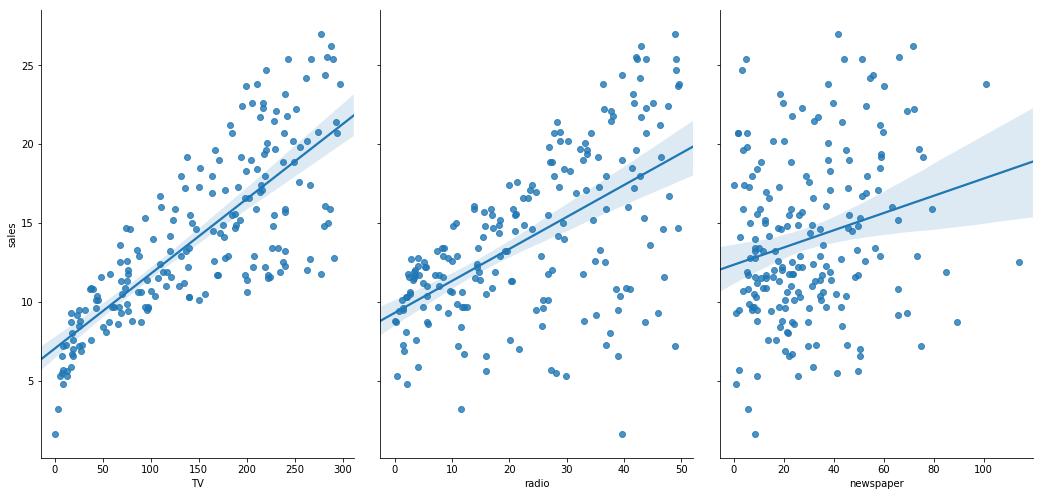

In [14]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Linear regression
Pros: fast, no tuning required, highly interpretable, well-understood

Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X & Y Using Pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [17]:
# METHOD 1
# Create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# Use the list to select a subset of the original DataFrame
X = data[feature_cols]

# METHOD 2
# Create a Python list of feature names
X = data[['TV', 'radio', 'newspaper']]

# Print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
# Check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [21]:
# METHOD 1
# Select a Series from the DataFrame
y = data['sales']

# METHOD 2
# Select a Series from the DataFrame
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [26]:
# Check the type and shape of y
print(type(y))
print(y.shape)

# Create a function to check type and shape
def check(x):
    print(type(x))
    print(x.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [29]:
# Default split is 75% for training, 25% for testing
check(X_train)
check(X_test)
check(y_train)
check(y_test)

<class 'pandas.core.frame.DataFrame'>
(150, 3)
<class 'pandas.core.frame.DataFrame'>
(50, 3)
<class 'pandas.core.series.Series'>
(150,)
<class 'pandas.core.series.Series'>
(50,)


## Linear Regression in Scikit-Learn

In [31]:
from sklearn.linear_model import LinearRegression
# Instantiate
linreg = LinearRegression()

# Fit
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpret model coefficients

In [32]:
# Print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [33]:
# Pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('radio', 0.1791581224508884),
 ('newspaper', 0.003450464711180379)]

### Make predictions

In [44]:
# Make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression
Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems

In [37]:
# Define true and predicted response values (Fake data)
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [41]:
# Calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# Calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [42]:
# Calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# Calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [40]:
# Calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# Calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## Computing the RMSE for our Sales predictions

In [45]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328948


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the **RMSE**!

In [49]:
# Create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886
